Episode 1: Reward = 500.0
Episode 2: Reward = 500.0
Episode 3: Reward = 500.0
Episode 4: Reward = 500.0
Episode 5: Reward = 500.0
Episode 6: Reward = 500.0
Episode 7: Reward = 500.0
Episode 8: Reward = 500.0
Episode 9: Reward = 500.0
Episode 10: Reward = 500.0
Episode 11: Reward = 500.0
Episode 12: Reward = 500.0
Episode 13: Reward = 500.0
Episode 14: Reward = 500.0
Episode 15: Reward = 500.0
Episode 16: Reward = 500.0
Episode 17: Reward = 500.0
Episode 18: Reward = 500.0
Episode 19: Reward = 500.0
Episode 20: Reward = 500.0
Episode 21: Reward = 500.0
Episode 22: Reward = 500.0
Episode 23: Reward = 500.0
Episode 24: Reward = 500.0
Episode 25: Reward = 500.0
Episode 26: Reward = 500.0
Episode 27: Reward = 500.0
Episode 28: Reward = 500.0
Episode 29: Reward = 500.0
Episode 30: Reward = 500.0
Episode 31: Reward = 500.0
Episode 32: Reward = 500.0
Episode 33: Reward = 500.0
Episode 34: Reward = 500.0
Episode 35: Reward = 500.0
Episode 36: Reward = 500.0
Episode 37: Reward = 500.0
Episode 38

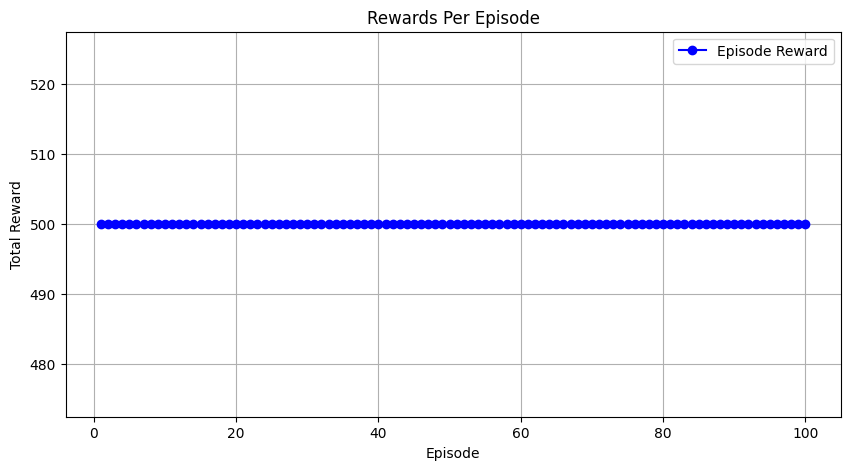

In [ ]:
import gym
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the model architecture
class Policy_Network(nn.Module):
    def __init__(self, num_observations, num_actions):
        super(Policy_Network, self).__init__()
        self.fc1 = nn.Linear(num_observations, 128)
        self.fc2 = nn.Linear(128, num_actions)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Load the model
def load_model(model_path, num_observations, num_actions):
    model = Policy_Network(num_observations, num_actions)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

# Evaluate the model on the CartPole environment and plot rewards
def evaluate_model(model, num_episodes=100, render=False):
    max_time_steps = 500
    env = gym.make("CartPole-v1")
    rewards = []  

    for episode in range(num_episodes):
        observation, info = env.reset()
        done = False
        total_reward = 0
        time_steps = 0

        while not done and time_steps < max_time_steps:
            obs_tensor = torch.tensor(np.array(observation), dtype=torch.float32).unsqueeze(0)
            action_probs = model(obs_tensor)
            action = np.argmax(action_probs.detach().numpy())  # Choose the action with max probability

            observation, reward, terminated, truncated, info = env.step(action)

            total_reward += reward
            time_steps += 1
            done = terminated or truncated 

            if render:
                env.render()

        rewards.append(total_reward)  # Store the total reward for the episode
        print(f"Episode {episode+1}: Reward = {total_reward}")

    env.close()

    # Plot the rewards across episodes
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_episodes + 1), rewards, marker="o", linestyle="-", color="b", label="Episode Reward")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Rewards Per Episode")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Create the environment
    env = gym.make("CartPole-v1", render_mode="human")
    num_observations = env.observation_space.shape[0]
    num_actions = env.action_space.n

    # Load the model
    model = load_model("reinforce_cartpole.pth", num_observations, num_actions)

    # Evaluate the model and plot rewards
    evaluate_model(model, render=False)  
